filtered_stocks = self._ticker_data[(self._ticker_data['ticker'] == 'AAPL')]


[*********************100%***********************]  1 of 1 completed

import yfinance as yf
import pandas as pd
tickers = ['AAPL']
start_date = '2018-10-01'
end_date = '2023-10-01'
_strategy_data = pd.DataFrame()
for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    _strategy_data[ticker] = data['Close']
Loading data...


[{'role': 'system', 'content': 'You are a quantitative analyst. You are given a prompt and a strategy definition. You need to call the strategy with the correct arguments and parameters. Return only the code, no markdown or comments.'}, {'role': 'user', 'content': 'Return the code to call the strategy with the correct arguments and parameters.  Pass the dataframe specifically as "self._strategy_data". Here is the prompt: [I want to use a regression strategy to trade AAPL for the past 5 years] Here is the class to call: [<function MachineLearningStrategies.linear_regression at 0x123f52cb0>] Here are the arguments and parameters: [OrderedDict([(\'df\', <Parameter "df: pandas.core.frame.DataFrame">), (\'lags\', <Parameter "lags: int = 5">)])] Use uppercase for tickers. The call should look like this: class_name.your_strategy(df=self._strategy_data, *args, **kwargs)'}]
MachineLearningStrategies.linear_regression(df=self._strategy_data, lags=5)
                 AAPL  AAPL_return  AAPL_Lag_1

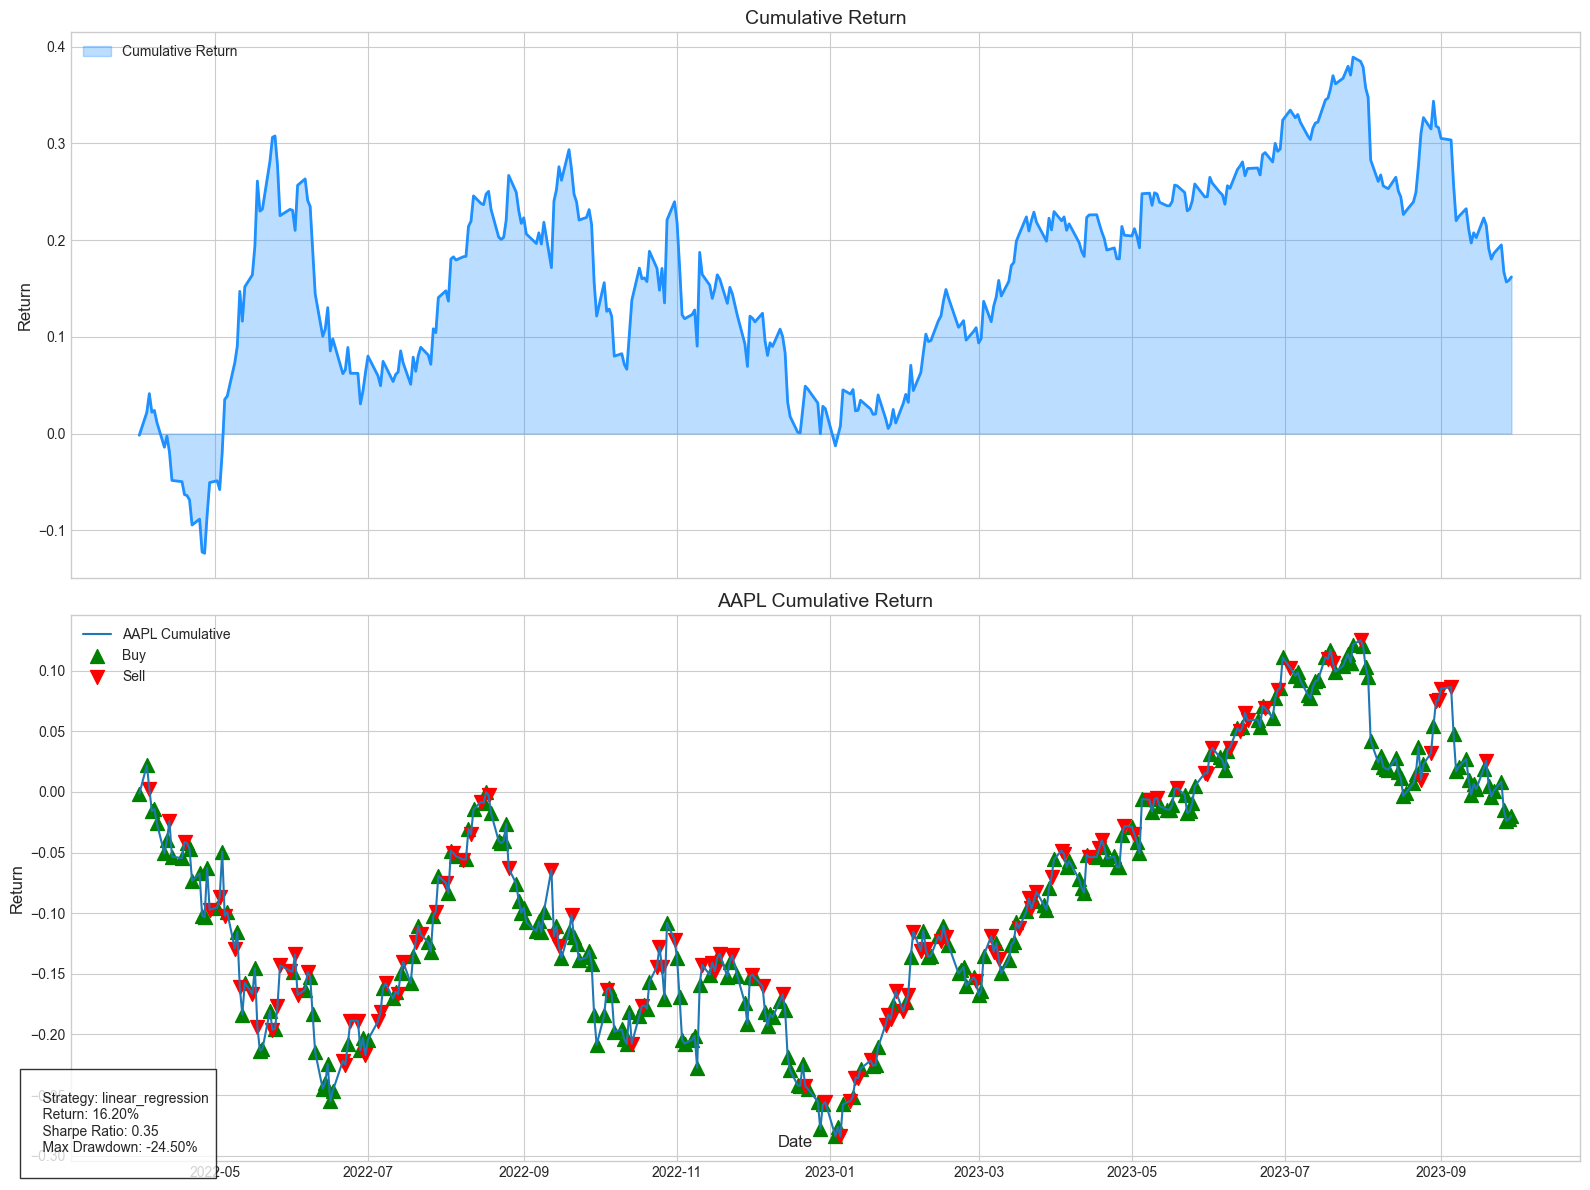

In [4]:
import yfinance as yf
import pandas as pd
from tr4der.tr4der import Tr4der

query = "I want to use a regression strategy to trade AAPL for the past 5 years"

inst = Tr4der(query)


In [11]:
df.head(5)

,AAPL,AAPL_return,AAPL_Lag_1,AAPL_Lag_2,AAPL_Lag_3,AAPL_Lag_4,AAPL_Lag_5
Date,,,,,,,
2018-10-01,56.814999,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-02,57.320000,0.008889,56.814999,NaN,NaN,NaN,NaN
2018-10-03,58.017502,0.012169,57.320000,56.814999,NaN,NaN,NaN
2018-10-04,56.997501,-0.017581,58.017502,57.320000,56.814999,NaN,NaN
2018-10-05,56.072498,-0.016229,56.997501,58.017502,57.320000,56.814999,NaN


In [32]:

import ta


pd.set_option('display.max_rows', None)
df = inst.strategy_data
columns_to_drop = ['AAPL_Lag_1', 'AAPL_Lag_2', 'AAPL_Lag_3', 'AAPL_Lag_4', 'AAPL_Lag_5']
df = df.drop(columns=columns_to_drop)


df['SMA_20'] = ta.trend.SMAIndicator(df['AAPL_return'], window=20).sma_indicator()
df['SMA_50'] = ta.trend.SMAIndicator(df['AAPL_return'], window=50).sma_indicator()
df['EMA_20'] = ta.trend.EMAIndicator(df['AAPL_return'], window=20).ema_indicator()
df['EMA_50'] = ta.trend.EMAIndicator(df['AAPL_return'], window=50).ema_indicator()
df['RSI_14'] = ta.momentum.RSIIndicator(df['AAPL_return'], window=14).rsi()
df = df.dropna()
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0)
df['Cluster'] = kmeans.fit_predict(df[['SMA_20', 'SMA_50', 'EMA_20', 'EMA_50']])
df.head(20)

,AAPL,AAPL_return,SMA_20,SMA_50,EMA_20,EMA_50,RSI_14,Cluster
Date,,,,,,,,
2018-12-12,42.275002,0.002787,-0.006595,-0.005594,-0.006163,-0.004232,51.127503,0
2018-12-13,42.737499,0.010940,-0.005549,-0.005553,-0.004534,-0.003637,52.129183,0
2018-12-14,41.369999,-0.031998,-0.005736,-0.006436,-0.007150,-0.004749,46.700533,0
2018-12-17,40.985001,-0.009306,-0.007435,-0.006271,-0.007355,-0.004928,49.682716,0
2018-12-18,41.517502,0.012993,-0.007340,-0.005686,-0.005417,-0.004225,52.495586,0
2018-12-19,40.222500,-0.031192,-0.006918,-0.006264,-0.007872,-0.005282,46.900797,0
2018-12-20,39.207500,-0.025235,-0.005790,-0.007046,-0.009525,-0.006065,47.709951,0
2018-12-21,37.682499,-0.038896,-0.007679,-0.006897,-0.012323,-0.007352,45.979569,0
2018-12-24,36.707500,-0.025874,-0.007702,-0.007238,-0.013613,-0.008079,47.918587,0


In [33]:
print(df[df['Cluster'] == 0].AAPL_return.mean())
print(df[df['Cluster'] == 1].AAPL_return.mean())
print(df[df['Cluster'] == 2].AAPL_return.mean())
print(df[df['Cluster'] == 3].AAPL_return.mean())
print(df[df['Cluster'] == 4].AAPL_return.mean())

-0.014819705723164845
0.011114351436685108
0.004611105910214066
-0.00044057278196183065
0.00018464632411316245
